# Fashion MNIST dataset
This dataset contains images of fashion accessories of 700K in grayscale

## Importing libraries

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

In [5]:
import cv2

## Loading datasets and exploration

In [6]:
fmnist = keras.datasets.fashion_mnist

In [7]:
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

In [9]:
np.unique(training_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [13]:
training_labels[:1]

array([9], dtype=uint8)

LABEL: 1

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0 128 148 117 122 114 109 115 114 143 168 173 165   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 231 205 237 233 237 240 237 229 236 234 185 220   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  25 245 190 178 182 178 156 145 154 168 173 185 227  10   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  70 224 166 180 190 201 202 207 200 185 174 167 213  36   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  94 207 168 185 186 197 197 193 189 178 179 165 206  66   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 114 201 172 180 182 191 207 193 199 189 178 166 195 101   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 131 196 176 182 183 185 206 191 205 186 183 178 189 120   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 145 186 173 183 178 170 205 202 205 184 178 172 186 126   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 149 188 176 171 180 

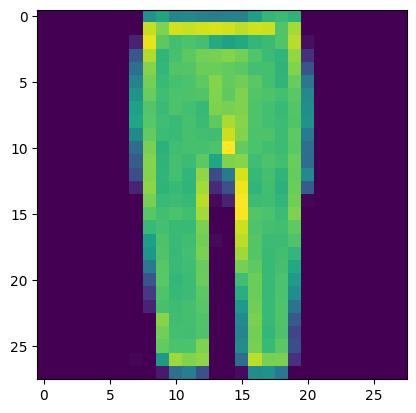

In [8]:
# You can put between 0 to 59999 here
index = 98

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

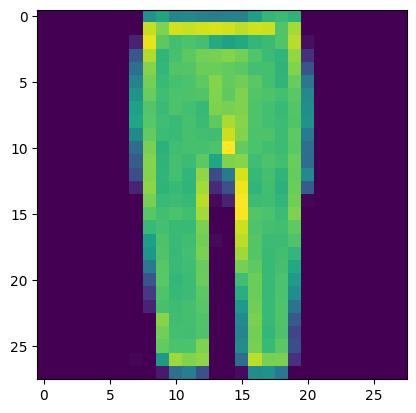

In [9]:
plt.imshow(training_images[index]/1000)

In [10]:
value, count = np.unique(training_labels, return_counts= True)

In [11]:
print(pd.DataFrame(
    {"labels": list(value), "count": list(count)}))

   labels  count
0       0   6000
1       1   6000
2       2   6000
3       3   6000
4       4   6000
5       5   6000
6       6   6000
7       7   6000
8       8   6000
9       9   6000


In [12]:
# This shows that the training labels are balanced in training sets

## Data preprocessing

In [13]:
# It is essential to normalize or scale down data for better performance of neural networks
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [14]:
 sample = np.array([cv2.GaussianBlur(training_images[index], (3, 3), 0)])

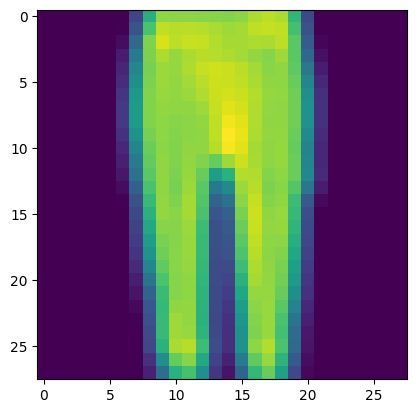

In [15]:
plt.imshow(sample[0])

## Defining NN model

In [16]:
# We can solve above problem using fully connected network to learn patterns present in arrays of gray_scaled 28*28 images
# The input model will flatten 2D matrix input stream onto tuples of unidimensional features resulting in X
# My initial is to try shallow network with hidden layer of RELU on linear model
# The output function would be softmax due to multi-class classification problem having 10 classes

In [17]:
model = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(10, activation='softmax')  # output layer for 10 classes
    ]
)

In [18]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7819 - loss: 0.6301
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8641 - loss: 0.3792
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8742 - loss: 0.3425
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8832 - loss: 0.3147
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8930 - loss: 0.2909


## Result and error analysis with hyperparameter space

In [21]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8754 - loss: 0.3453


[0.347629576921463, 0.8769999742507935]

## Using callback for stopping epoch computation

In [22]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training after reaching 60 percent accuracy

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check accuracy
    if(logs.get('loss') < 0.4):

      # Stop if threshold is met
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [23]:
model_config = model.get_config()

In [24]:
model2 = keras.Sequential.from_config(model_config)

In [25]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:
model2.fit(training_images, training_labels,epochs= 10, callbacks= callbacks)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7823 - loss: 0.6272
Epoch 2/10
1854/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8634 - loss: 0.3841
Loss is lower than 0.4 so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8634 - loss: 0.3840


In [28]:
# The model reached loss of below 0.4. However, callback is defined on_end_epoch

In [29]:
model2.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([[2.74916038e-05, 6.88876156e-08, 5.75122749e-06, ..., 1.53775513e-01, 7.27976556e-04, 8.11573505e-01],
       [3.53525684e-05, 7.60737073e-09, 9.85199690e-01, ..., 3.78786946e-10, 3.58315174e-06, 8.38644678e-14],
       [6.52248900e-06, 9.99982595e-01, 3.68159760e-07, ..., 2.60143244e-11, 1.65088167e-07, 5.36054499e-11],
       ...,
       [5.42509789e-03, 1.22262222e-07, 3.81856575e-04, ..., 1.37747566e-06, 9.87843871e-01, 6.24726283e-07],
       [1.62272875e-06, 9.99483705e-01, 2.86280084e-07, ..., 8.63638849e-09, 1.12302416e-06, 4.97526678e-08],
       [9.89603926e-04, 2.15230320e-05, 5.87721122e-04, ..., 1.12059005e-01, 1.90505013e-02, 3.08775343e-03]], dtype=float32)

In [30]:
model2.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8502 - loss: 0.4094


[0.4112447202205658, 0.8500000238418579]

## CNN for vision learning

In [31]:
model_config

{'name': 'sequential',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units

In [34]:
m = keras.Sequential()

In [36]:
m.add(keras.layers.Dense(12))

In [42]:
m.add(keras.layers.Conv2D(12, (3,3)))

In [43]:
m.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Define the model
cnn_model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [33]:
# Print the model summary
cnn_model.summary()

# Use same settings
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,386 (442.91 KB)

 Trainable params: 113,386 (442.91 KB)

 Non-trainable params: 0 (0.00 B)